STAT4984 Final Project

Aditya Mallapragada

In [1]:
import torch
import torchvision
from torchvision import transforms as tforms
from torchvision import datasets as dsets

In [2]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as functional
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
train = torchvision.datasets.CIFAR10('./data', train=True, download=True,transform=tforms.Compose([tforms.ToTensor()]))
test = torchvision.datasets.CIFAR10('./data', train=False, download=True,transform=tforms.Compose([tforms.ToTensor()]))
training_dataset = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
testing_dataset = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Model 1: Basic CNN

In [5]:
class ConvolutionalNeuralNet(nn.Module):
  def __init__(self):
    super(ConvolutionalNeuralNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2, stride=2)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=2, stride=2)  
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=2, stride=1)  
    self.fc1 = nn.Linear(128, 64)
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
      y = self.conv1(x)
      y = functional.relu(y)
      y = self.pool1(y)
      y = self.conv2(y)
      y = functional.relu(y)
      y = self.pool2(y)
      y = self.conv3(y)
      y = torch.flatten(y, 1)
      y = self.fc1(y)
      y = functional.relu(y)
      y = self.fc2(y)
      return y

In [6]:
conv_net = ConvolutionalNeuralNet().to(device)
print(conv_net)

ConvolutionalNeuralNet(
  (conv1): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv_net.parameters(), lr=0.001)

In [8]:
num_epochs = [num for num in range(40)]
accuracy_list = []
for epoch in num_epochs: 
    classified_right = 0.0
    classified_total = 0.0
    training_index = 0.0
    loss_epoch = 0.0
    accuracy_epoch = 0.0
    loss_current = 0.0
    for train_data in training_dataset:  
        images, labels = train_data
        images = images.to(device)
        labels = labels.to(device) 
        conv_net.zero_grad()  
        output = conv_net(images)  
        loss = loss_function(output, labels)  
        loss.backward()  
        optimizer.step()  
        enum = enumerate(output)
        for index, a in enum:
          classified_total += 1.0
          if torch.argmax(a) == labels[index]:
              classified_right += 1.0
        loss_item = loss.item()
        loss_current += loss_item
        training_index += 1.0
    loss_epoch = loss_current / training_index
    accuracy_epoch = classified_right / classified_total
    print("Epoch " + str(epoch) + " Training Loss: " + str(loss_epoch) + ",     Training Accuracy: " + str(accuracy_epoch))

Epoch 0 Training Loss: 1.821129041559556,     Training Accuracy: 0.32082
Epoch 1 Training Loss: 1.5444364384617038,     Training Accuracy: 0.42632
Epoch 2 Training Loss: 1.434954092935528,     Training Accuracy: 0.47148
Epoch 3 Training Loss: 1.3591079506117973,     Training Accuracy: 0.5013
Epoch 4 Training Loss: 1.3066981302960146,     Training Accuracy: 0.52616
Epoch 5 Training Loss: 1.261992835404013,     Training Accuracy: 0.54172
Epoch 6 Training Loss: 1.2283891319009044,     Training Accuracy: 0.55746
Epoch 7 Training Loss: 1.194274018868766,     Training Accuracy: 0.56788
Epoch 8 Training Loss: 1.1638764771049286,     Training Accuracy: 0.58206
Epoch 9 Training Loss: 1.1427543538305767,     Training Accuracy: 0.58764
Epoch 10 Training Loss: 1.125495948068931,     Training Accuracy: 0.59746
Epoch 11 Training Loss: 1.1053772767638916,     Training Accuracy: 0.60156
Epoch 12 Training Loss: 1.0903448773467022,     Training Accuracy: 0.60998
Epoch 13 Training Loss: 1.076203188551661

In [9]:
test_correct = 0.0
test_total = 0.0
with torch.no_grad():
    for test_data in testing_dataset:
        images, labels = test_data
        images = images.to(device)  
        labels = labels.to(device)
        output = conv_net(images)
        enum = enumerate(output)
        for index, a in enum:
          test_total += 1.0
          if torch.argmax(a) == labels[index]:
            test_correct += 1.0
accuracy_epoch = test_correct / test_total
print("Testing Loss: " + str(loss_epoch) + ",     Testing Accuracy: " + str(accuracy_epoch))

Testing Loss: 0.8742728000864044,     Testing Accuracy: 0.6072


Model 2: More Linear Layers, More Parameters and Higher Learning Rate

In [10]:
class ConvolutionalNeuralNet2(nn.Module):
  def __init__(self):
    super(ConvolutionalNeuralNet2, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=512, kernel_size=2, stride=2)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=512, out_channels=128, kernel_size=2, stride=2)  
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv3 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=2, stride=2)   
    self.fc1 = nn.Linear(128, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
      y = self.conv1(x)
      y = functional.relu(y)
      y = self.pool1(y)
      y = self.conv2(y)
      y = functional.relu(y)
      y = self.pool2(y)
      y = self.conv3(y)
      y = torch.flatten(y, 1)
      y = self.fc1(y)
      y = functional.relu(y)
      y = self.fc2(y)
      y = functional.relu(y)
      y = self.fc3(y)
      return y

In [11]:
conv_net_2 = ConvolutionalNeuralNet2().to(device)
print(conv_net_2)

ConvolutionalNeuralNet2(
  (conv1): Conv2d(3, 512, kernel_size=(2, 2), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(512, 128, kernel_size=(2, 2), stride=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 128, kernel_size=(2, 2), stride=(2, 2))
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [14]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv_net_2.parameters(), lr=0.01)

In [15]:
num_epochs = [num for num in range(40)]
accuracy_list = []
for epoch in num_epochs: 
    classified_right = 0.0
    classified_total = 0.0
    training_index = 0.0
    loss_epoch = 0.0
    accuracy_epoch = 0.0
    loss_current = 0.0
    for train_data in training_dataset:  
        images, labels = train_data
        images = images.to(device)
        labels = labels.to(device) 
        conv_net_2.zero_grad()  
        output = conv_net_2(images)  
        loss = loss_function(output, labels)  
        loss.backward()  
        optimizer.step()  
        enum = enumerate(output)
        for index, a in enum:
          classified_total += 1.0
          if torch.argmax(a) == labels[index]:
              classified_right += 1.0
        loss_item = loss.item()
        loss_current += loss_item
        training_index += 1.0
    loss_epoch = loss_current / training_index
    accuracy_epoch = classified_right / classified_total
    print("Epoch " + str(epoch) + " Training Loss: " + str(loss_epoch) + ",     Training Accuracy: " + str(accuracy_epoch))

Epoch 0 Training Loss: 1.875935906796809,     Training Accuracy: 0.28642
Epoch 1 Training Loss: 1.706293952129686,     Training Accuracy: 0.36282
Epoch 2 Training Loss: 1.646045821706962,     Training Accuracy: 0.395
Epoch 3 Training Loss: 1.6017529121445269,     Training Accuracy: 0.41368
Epoch 4 Training Loss: 1.5766871039519834,     Training Accuracy: 0.41948
Epoch 5 Training Loss: 1.561179314580415,     Training Accuracy: 0.4299
Epoch 6 Training Loss: 1.5491063828053682,     Training Accuracy: 0.43266
Epoch 7 Training Loss: 1.5437832528063098,     Training Accuracy: 0.43398
Epoch 8 Training Loss: 1.5331460144513709,     Training Accuracy: 0.44036
Epoch 9 Training Loss: 1.5304102246718638,     Training Accuracy: 0.44272
Epoch 10 Training Loss: 1.519857694883176,     Training Accuracy: 0.447
Epoch 11 Training Loss: 1.5159868180294476,     Training Accuracy: 0.44494
Epoch 12 Training Loss: 1.5147155029389558,     Training Accuracy: 0.44784
Epoch 13 Training Loss: 1.5048345743542741,  

In [16]:
test_correct = 0.0
test_total = 0.0
with torch.no_grad():
    for test_data in testing_dataset:
        images, labels = test_data
        images = images.to(device)  
        labels = labels.to(device)
        output = conv_net_2(images)
        enum = enumerate(output)
        for index, a in enum:
          test_total += 1.0
          if torch.argmax(a) == labels[index]:
            test_correct += 1.0
accuracy_epoch = test_correct / test_total
print("Testing Loss: " + str(loss_epoch) + ",     Testing Accuracy: " + str(accuracy_epoch))

Testing Loss: 1.4357892634618619,     Testing Accuracy: 0.457


Model 3: VGG Two Conv and Pool Block CNN and SGD Optimizer 

In [17]:
class ConvolutionalNeuralNet3(nn.Module):
  def __init__(self):
    super(ConvolutionalNeuralNet3, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=2, stride=2)  
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv3 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=2, stride=2)  
    self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2, stride=2)  
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(1024, 512)
    self.fc2 = nn.Linear(512, 128)
    self.fc3 = nn.Linear(128, 10)

  def forward(self, x):
      y = self.conv1(x)
      y = functional.relu(y)
      y = self.conv2(y)
      y = functional.relu(y)
      y = self.pool1(y)
      y = self.conv3(x)
      y = functional.relu(y)
      y = self.conv4(y)
      y = functional.relu(y)
      y = self.pool2(y)
      y = torch.flatten(y, 1)
      y = self.fc1(y)
      y = functional.relu(y)
      y = self.fc2(y)
      y = functional.relu(y)
      y = self.fc3(y)
      return y

In [18]:
conv_net_3 = ConvolutionalNeuralNet3().to(device)
print(conv_net_3)

ConvolutionalNeuralNet3(
  (conv1): Conv2d(3, 16, kernel_size=(2, 2), stride=(2, 2))
  (conv2): Conv2d(16, 16, kernel_size=(2, 2), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(3, 64, kernel_size=(2, 2), stride=(2, 2))
  (conv4): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [19]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(conv_net_3.parameters(), lr=0.01, momentum=0.9)

In [20]:
num_epochs = [num for num in range(40)]
accuracy_list = []
for epoch in num_epochs: 
    classified_right = 0.0
    classified_total = 0.0
    training_index = 0.0
    loss_epoch = 0.0
    accuracy_epoch = 0.0
    loss_current = 0.0
    for train_data in training_dataset:  
        images, labels = train_data
        images = images.to(device)
        labels = labels.to(device) 
        conv_net_3.zero_grad()  
        output = conv_net_3(images)  
        loss = loss_function(output, labels)  
        loss.backward()  
        optimizer.step()  
        enum = enumerate(output)
        for index, a in enum:
          classified_total += 1.0
          if torch.argmax(a) == labels[index]:
              classified_right += 1.0
        loss_item = loss.item()
        loss_current += loss_item
        training_index += 1.0
    loss_epoch = loss_current / training_index
    accuracy_epoch = classified_right / classified_total
    print("Epoch " + str(epoch) + " Training Loss: " + str(loss_epoch) + ",     Training Accuracy: " + str(accuracy_epoch))

Epoch 0 Training Loss: 2.037738325803176,     Training Accuracy: 0.23916
Epoch 1 Training Loss: 1.507803651377978,     Training Accuracy: 0.45268
Epoch 2 Training Loss: 1.3478377946197528,     Training Accuracy: 0.51262
Epoch 3 Training Loss: 1.217900978101184,     Training Accuracy: 0.56292
Epoch 4 Training Loss: 1.0998022647007653,     Training Accuracy: 0.6065
Epoch 5 Training Loss: 1.0014992519412809,     Training Accuracy: 0.64202
Epoch 6 Training Loss: 0.9188111889392824,     Training Accuracy: 0.6737
Epoch 7 Training Loss: 0.8342466010614429,     Training Accuracy: 0.70358
Epoch 8 Training Loss: 0.7488265068406035,     Training Accuracy: 0.73672
Epoch 9 Training Loss: 0.6666494397937185,     Training Accuracy: 0.76516
Epoch 10 Training Loss: 0.5823528167155697,     Training Accuracy: 0.7955
Epoch 11 Training Loss: 0.4951778141891255,     Training Accuracy: 0.82548
Epoch 12 Training Loss: 0.4219711245325825,     Training Accuracy: 0.85052
Epoch 13 Training Loss: 0.348670760174389

In [21]:
test_correct = 0.0
test_total = 0.0
with torch.no_grad():
    for test_data in testing_dataset:
        images, labels = test_data
        images = images.to(device)  
        labels = labels.to(device)
        output = conv_net_3(images)
        enum = enumerate(output)
        for index, a in enum:
          test_total += 1.0
          if torch.argmax(a) == labels[index]:
            test_correct += 1.0
accuracy_epoch = test_correct / test_total
print("Testing Loss: " + str(loss_epoch) + ",     Testing Accuracy: " + str(accuracy_epoch))

Testing Loss: 0.005684422323955474,     Testing Accuracy: 0.6458


Model 4: VGG Three Conv and Pool Block CNN, Lower Learning Rate, and Batch Normalization

In [22]:
class ConvolutionalNeuralNet4(nn.Module):
  def __init__(self):
    super(ConvolutionalNeuralNet4, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=2, stride=2)  
    self.batch1 = nn.BatchNorm2d(16)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv3 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2, stride=2)  
    self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=2, stride=2)  
    self.batch2 = nn.BatchNorm2d(32)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv5 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=2, stride=2)
    self.conv6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2, stride=2)  
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(1024, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 10)

  def forward(self, x):
      y = self.conv1(x)
      y = functional.relu(y)
      y = self.conv2(y)
      y = functional.relu(y)
      y = self.batch1(y)
      y = self.pool1(y)
      y = self.conv3(x)
      y = functional.relu(y)
      y = self.conv4(y)
      y = functional.relu(y)
      y = self.batch2(y)
      y = self.pool2(y)
      y = self.conv5(x)
      y = functional.relu(y)
      y = self.conv6(y)
      y = functional.relu(y)
      y = self.pool3(y)
      y = torch.flatten(y, 1)
      y = self.fc1(y)
      y = functional.relu(y)
      y = self.fc2(y)
      y = functional.relu(y)
      y = self.fc3(y)
      return y

In [23]:
conv_net_4 = ConvolutionalNeuralNet4().to(device)
print(conv_net_4)

ConvolutionalNeuralNet4(
  (conv1): Conv2d(3, 16, kernel_size=(2, 2), stride=(2, 2))
  (conv2): Conv2d(16, 16, kernel_size=(2, 2), stride=(2, 2))
  (batch1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
  (conv4): Conv2d(32, 32, kernel_size=(2, 2), stride=(2, 2))
  (batch2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(3, 64, kernel_size=(2, 2), stride=(2, 2))
  (conv6): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features

In [24]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(conv_net_4.parameters(), lr=0.001, momentum=0.9)

In [25]:
num_epochs = [num for num in range(40)]
accuracy_list = []
for epoch in num_epochs: 
    classified_right = 0.0
    classified_total = 0.0
    training_index = 0.0
    loss_epoch = 0.0
    accuracy_epoch = 0.0
    loss_current = 0.0
    for train_data in training_dataset:  
        images, labels = train_data
        images = images.to(device)
        labels = labels.to(device) 
        conv_net_4.zero_grad()  
        output = conv_net_4(images)  
        loss = loss_function(output, labels)  
        loss.backward()  
        optimizer.step()  
        enum = enumerate(output)
        for index, a in enum:
          classified_total += 1.0
          if torch.argmax(a) == labels[index]:
              classified_right += 1.0
        loss_item = loss.item()
        loss_current += loss_item
        training_index += 1.0
    loss_epoch = loss_current / training_index
    accuracy_epoch = classified_right / classified_total
    print("Epoch " + str(epoch) + " Training Loss: " + str(loss_epoch) + ",     Training Accuracy: " + str(accuracy_epoch))

Epoch 0 Training Loss: 2.296011539371422,     Training Accuracy: 0.13926
Epoch 1 Training Loss: 2.231026102514828,     Training Accuracy: 0.18222
Epoch 2 Training Loss: 2.0537724789146266,     Training Accuracy: 0.247
Epoch 3 Training Loss: 1.9829933192114086,     Training Accuracy: 0.271
Epoch 4 Training Loss: 1.8981528169358783,     Training Accuracy: 0.31022
Epoch 5 Training Loss: 1.7762265857833122,     Training Accuracy: 0.35434
Epoch 6 Training Loss: 1.6747304945040846,     Training Accuracy: 0.39352
Epoch 7 Training Loss: 1.5931231765186085,     Training Accuracy: 0.42402
Epoch 8 Training Loss: 1.5342843974642741,     Training Accuracy: 0.44582
Epoch 9 Training Loss: 1.4850228500488165,     Training Accuracy: 0.46296
Epoch 10 Training Loss: 1.4456998545800328,     Training Accuracy: 0.47798
Epoch 11 Training Loss: 1.4125991831045321,     Training Accuracy: 0.49152
Epoch 12 Training Loss: 1.3813722975113814,     Training Accuracy: 0.50374
Epoch 13 Training Loss: 1.3500290312578, 

In [26]:
test_correct = 0.0
test_total = 0.0
with torch.no_grad():
    for test_data in testing_dataset:
        images, labels = test_data
        images = images.to(device)  
        labels = labels.to(device)
        output = conv_net_4(images)
        enum = enumerate(output)
        for index, a in enum:
          test_total += 1.0
          if torch.argmax(a) == labels[index]:
            test_correct += 1.0
accuracy_epoch = test_correct / test_total
print("Testing Loss: " + str(loss_epoch) + ",     Testing Accuracy: " + str(accuracy_epoch))

Testing Loss: 0.8403591756777995,     Testing Accuracy: 0.6101


Model 5: VGG Three Conv and Pool Blocks and Dropout Regularization

In [27]:
class ConvolutionalNeuralNet5(nn.Module):
  def __init__(self):
    super(ConvolutionalNeuralNet5, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=2, stride=2)  
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv3 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=2, stride=2)  
    self.conv4 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=2, stride=2)  
    self.drop1 = nn.Dropout(0.3)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv5 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=2, stride=2)
    self.conv6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=2, stride=2)  
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.drop2 = nn.Dropout(0.3)
    self.fc1 = nn.Linear(1024, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 10)

  def forward(self, x):
      y = self.conv1(x)
      y = functional.relu(y)
      y = self.conv2(y)
      y = functional.relu(y)
      y = self.pool1(y)
      y = self.conv3(x)
      y = functional.relu(y)
      y = self.conv4(y)
      y = functional.relu(y)
      y = self.pool2(y)
      y = self.drop1(y)
      y = self.conv5(x)
      y = functional.relu(y)
      y = self.conv6(y)
      y = functional.relu(y)
      y = self.pool3(y)
      y = self.drop2(y)
      y = torch.flatten(y, 1)
      y = self.fc1(y)
      y = functional.relu(y)
      y = self.fc2(y)
      y = functional.relu(y)
      y = self.fc3(y)
      return y

In [28]:
conv_net_5 = ConvolutionalNeuralNet5().to(device)
print(conv_net_5)

ConvolutionalNeuralNet5(
  (conv1): Conv2d(3, 16, kernel_size=(2, 2), stride=(2, 2))
  (conv2): Conv2d(16, 16, kernel_size=(2, 2), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
  (conv4): Conv2d(32, 32, kernel_size=(2, 2), stride=(2, 2))
  (drop1): Dropout(p=0.3, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(3, 64, kernel_size=(2, 2), stride=(2, 2))
  (conv6): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [29]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(conv_net_5.parameters(), lr=0.001, momentum=0.9)

In [30]:
num_epochs = [num for num in range(40)]
accuracy_list = []
for epoch in num_epochs: 
    classified_right = 0.0
    classified_total = 0.0
    training_index = 0.0
    loss_epoch = 0.0
    accuracy_epoch = 0.0
    loss_current = 0.0
    for train_data in training_dataset:  
        images, labels = train_data
        images = images.to(device)
        labels = labels.to(device) 
        conv_net_5.zero_grad()  
        output = conv_net_5(images)  
        loss = loss_function(output, labels)  
        loss.backward()  
        optimizer.step()  
        enum = enumerate(output)
        for index, a in enum:
          classified_total += 1.0
          if torch.argmax(a) == labels[index]:
              classified_right += 1.0
        loss_item = loss.item()
        loss_current += loss_item
        training_index += 1.0
    loss_epoch = loss_current / training_index
    accuracy_epoch = classified_right / classified_total
    print("Epoch " + str(epoch) + " Training Loss: " + str(loss_epoch) + ",     Training Accuracy: " + str(accuracy_epoch))

Epoch 0 Training Loss: 2.3016408742846126,     Training Accuracy: 0.11348
Epoch 1 Training Loss: 2.295316848913422,     Training Accuracy: 0.1406
Epoch 2 Training Loss: 2.261310745688046,     Training Accuracy: 0.17336
Epoch 3 Training Loss: 2.1137592132439087,     Training Accuracy: 0.2296
Epoch 4 Training Loss: 2.014413152356892,     Training Accuracy: 0.25768
Epoch 5 Training Loss: 1.9688024717523618,     Training Accuracy: 0.27798
Epoch 6 Training Loss: 1.897671230308845,     Training Accuracy: 0.30794
Epoch 7 Training Loss: 1.785638676884839,     Training Accuracy: 0.3515
Epoch 8 Training Loss: 1.6848861815984293,     Training Accuracy: 0.3929
Epoch 9 Training Loss: 1.6120600581474012,     Training Accuracy: 0.41614
Epoch 10 Training Loss: 1.5638711958590066,     Training Accuracy: 0.43358
Epoch 11 Training Loss: 1.5260894941856793,     Training Accuracy: 0.44554
Epoch 12 Training Loss: 1.4972815673674464,     Training Accuracy: 0.45914
Epoch 13 Training Loss: 1.47704348509269,   

In [31]:
test_correct = 0.0
test_total = 0.0
with torch.no_grad():
    for test_data in testing_dataset:
        images, labels = test_data
        images = images.to(device)  
        labels = labels.to(device)
        output = conv_net_5(images)
        enum = enumerate(output)
        for index, a in enum:
          test_total += 1.0
          if torch.argmax(a) == labels[index]:
            test_correct += 1.0
accuracy_epoch = test_correct / test_total
print("Testing Loss: " + str(loss_epoch) + ",     Testing Accuracy: " + str(accuracy_epoch))

Testing Loss: 1.1235811447395998,     Testing Accuracy: 0.5725


In [37]:
import os
os.getcwd()

'/content'

Method 1 and Method 5 Training Plots

Method 1

In [45]:
conv_net = ConvolutionalNeuralNet().to(device)
print(conv_net)

ConvolutionalNeuralNet(
  (conv1): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [46]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv_net.parameters(), lr=0.001)

Epoch 0 Training Loss: 1.8151018287214782,     Training Accuracy: 0.32324
Epoch 1 Training Loss: 1.5218850406234528,     Training Accuracy: 0.44104
Epoch 2 Training Loss: 1.4006035548951619,     Training Accuracy: 0.4893
Epoch 3 Training Loss: 1.3148020653773451,     Training Accuracy: 0.525
Epoch 4 Training Loss: 1.2570834457874298,     Training Accuracy: 0.54574
Epoch 5 Training Loss: 1.2115396703295696,     Training Accuracy: 0.56346
Epoch 6 Training Loss: 1.174277830001948,     Training Accuracy: 0.57938
Epoch 7 Training Loss: 1.1466239546723378,     Training Accuracy: 0.58874
Epoch 8 Training Loss: 1.122675394539333,     Training Accuracy: 0.59522
Epoch 9 Training Loss: 1.0996714183284193,     Training Accuracy: 0.60696
Epoch 10 Training Loss: 1.0822775527796782,     Training Accuracy: 0.61372
Epoch 11 Training Loss: 1.0637084328762405,     Training Accuracy: 0.6209
Epoch 12 Training Loss: 1.0512083966256407,     Training Accuracy: 0.62616
Epoch 13 Training Loss: 1.036028525027472

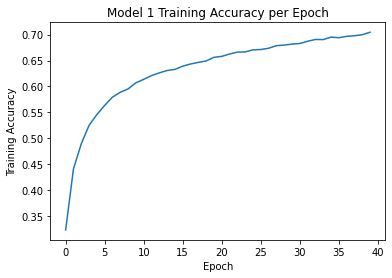

In [47]:
num_epochs = [num for num in range(40)]
accuracy_list = []
for epoch in num_epochs: 
    classified_right = 0.0
    classified_total = 0.0
    training_index = 0.0
    loss_epoch = 0.0
    accuracy_epoch = 0.0
    loss_current = 0.0
    for train_data in training_dataset:  
        images, labels = train_data
        images = images.to(device)
        labels = labels.to(device) 
        conv_net.zero_grad()  
        output = conv_net(images)  
        loss = loss_function(output, labels)  
        loss.backward()  
        optimizer.step()  
        enum = enumerate(output)
        for index, a in enum:
          classified_total += 1.0
          if torch.argmax(a) == labels[index]:
              classified_right += 1.0
        loss_item = loss.item()
        loss_current += loss_item
        training_index += 1.0
    loss_epoch = loss_current / training_index
    accuracy_epoch = classified_right / classified_total
    accuracy_list.append(accuracy_epoch)
    print("Epoch " + str(epoch) + " Training Loss: " + str(loss_epoch) + ",     Training Accuracy: " + str(accuracy_epoch))
plt.plot(num_epochs, accuracy_list)
plt.title("Model 1 Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.show()

Model 5 

In [50]:
conv_net_5 = ConvolutionalNeuralNet5().to(device)
print(conv_net_5)

ConvolutionalNeuralNet5(
  (conv1): Conv2d(3, 16, kernel_size=(2, 2), stride=(2, 2))
  (conv2): Conv2d(16, 16, kernel_size=(2, 2), stride=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(3, 32, kernel_size=(2, 2), stride=(2, 2))
  (conv4): Conv2d(32, 32, kernel_size=(2, 2), stride=(2, 2))
  (drop1): Dropout(p=0.3, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(3, 64, kernel_size=(2, 2), stride=(2, 2))
  (conv6): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [51]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(conv_net_5.parameters(), lr=0.001, momentum=0.9)

Epoch 0 Training Loss: 2.302119611474254,     Training Accuracy: 0.11694
Epoch 1 Training Loss: 2.2947361213167,     Training Accuracy: 0.14462
Epoch 2 Training Loss: 2.2617475773062545,     Training Accuracy: 0.1754
Epoch 3 Training Loss: 2.1329127606528493,     Training Accuracy: 0.23002
Epoch 4 Training Loss: 2.0294517069826346,     Training Accuracy: 0.25414
Epoch 5 Training Loss: 1.974879417882856,     Training Accuracy: 0.2748
Epoch 6 Training Loss: 1.8947672412523529,     Training Accuracy: 0.30622
Epoch 7 Training Loss: 1.7867441659083452,     Training Accuracy: 0.34972
Epoch 8 Training Loss: 1.7043267380246117,     Training Accuracy: 0.38278
Epoch 9 Training Loss: 1.6417189062099018,     Training Accuracy: 0.40364
Epoch 10 Training Loss: 1.5925014212613215,     Training Accuracy: 0.42322
Epoch 11 Training Loss: 1.5540408110984452,     Training Accuracy: 0.43632
Epoch 12 Training Loss: 1.5237533044632134,     Training Accuracy: 0.4498
Epoch 13 Training Loss: 1.4992222130451056,

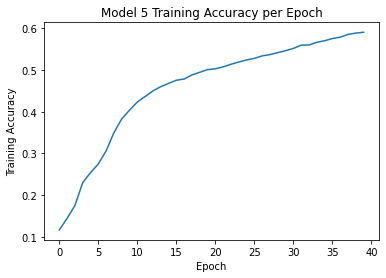

In [52]:
num_epochs = [num for num in range(40)]
accuracy_list = []
for epoch in num_epochs: 
    classified_right = 0.0
    classified_total = 0.0
    training_index = 0.0
    loss_epoch = 0.0
    accuracy_epoch = 0.0
    loss_current = 0.0
    for train_data in training_dataset:  
        images, labels = train_data
        images = images.to(device)
        labels = labels.to(device) 
        conv_net_5.zero_grad()  
        output = conv_net_5(images)  
        loss = loss_function(output, labels)  
        loss.backward()  
        optimizer.step()  
        enum = enumerate(output)
        for index, a in enum:
          classified_total += 1.0
          if torch.argmax(a) == labels[index]:
              classified_right += 1.0
        loss_item = loss.item()
        loss_current += loss_item
        training_index += 1.0
    loss_epoch = loss_current / training_index
    accuracy_epoch = classified_right / classified_total
    accuracy_list.append(accuracy_epoch)
    print("Epoch " + str(epoch) + " Training Loss: " + str(loss_epoch) + ",     Training Accuracy: " + str(accuracy_epoch))
plt.plot(num_epochs, accuracy_list)
plt.title("Model 5 Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.show()